# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь
A = np.random.randint(100, size=(10, 10))
A

array([[63, 72, 66, 17, 10, 26, 34, 44,  9,  5],
       [45,  1, 27,  9,  8, 28,  3, 31, 11, 20],
       [86, 84, 55, 80,  2, 20, 37, 31, 31, 76],
       [64, 33, 68, 40, 42, 13, 78, 37, 55, 53],
       [80, 30, 52,  7, 31, 50, 51, 97,  3, 58],
       [77, 96, 16, 95, 86,  4, 76,  8,  7, 12],
       [86, 23, 10, 95, 68, 26, 52,  1, 14, 14],
       [69, 48, 29,  4, 82, 41, 12, 12, 51, 72],
       [29, 95, 87, 81, 81, 97, 31, 63, 65, 67],
       [55, 12, 59, 15, 17, 56, 99, 99, 23, 42]])

In [4]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
arr = []
for i in A.T:
    arr.append(np.amax(i))
arr

[86, 96, 87, 95, 86, 97, 99, 99, 65, 76]

In [5]:
# Транспонируйте матрицу A

# Ваш код здесь
A.T

array([[63, 45, 86, 64, 80, 77, 86, 69, 29, 55],
       [72,  1, 84, 33, 30, 96, 23, 48, 95, 12],
       [66, 27, 55, 68, 52, 16, 10, 29, 87, 59],
       [17,  9, 80, 40,  7, 95, 95,  4, 81, 15],
       [10,  8,  2, 42, 31, 86, 68, 82, 81, 17],
       [26, 28, 20, 13, 50,  4, 26, 41, 97, 56],
       [34,  3, 37, 78, 51, 76, 52, 12, 31, 99],
       [44, 31, 31, 37, 97,  8,  1, 12, 63, 99],
       [ 9, 11, 31, 55,  3,  7, 14, 51, 65, 23],
       [ 5, 20, 76, 53, 58, 12, 14, 72, 67, 42]])

In [7]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
A * A.T

array([[3969, 3240, 5676, 1088,  800, 2002, 2924, 3036,  261,  275],
       [3240,    1, 2268,  297,  240, 2688,   69, 1488, 1045,  240],
       [5676, 2268, 3025, 5440,  104,  320,  370,  899, 2697, 4484],
       [1088,  297, 5440, 1600,  294, 1235, 7410,  148, 4455,  795],
       [ 800,  240,  104,  294,  961, 4300, 3468, 7954,  243,  986],
       [2002, 2688,  320, 1235, 4300,   16, 1976,  328,  679,  672],
       [2924,   69,  370, 7410, 3468, 1976, 2704,   12,  434, 1386],
       [3036, 1488,  899,  148, 7954,  328,   12,  144, 3213, 7128],
       [ 261, 1045, 2697, 4455,  243,  679,  434, 3213, 4225, 1541],
       [ 275,  240, 4484,  795,  986,  672, 1386, 7128, 1541, 1764]])

In [8]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

# Ваш код здесь
B = A.dot(A)
B

array([[23271, 17318, 14518, 14429, 11332,  9640, 11682, 10481,  7972,
        13021],
       [12390, 11576,  9024,  7610,  7523,  5903,  8619,  7229,  4766,
         7425],
       [31148, 21712, 25283, 19022, 15645, 16404, 23854, 21293, 13811,
        18905],
       [32057, 23612, 23732, 22762, 18834, 18468, 22493, 20839, 13237,
        20527],
       [31996, 22929, 18844, 17383, 19350, 14643, 20312, 16874, 10680,
        18056],
       [31766, 16024, 21859, 16234, 15165, 14216, 21051, 20550,  9959,
        16205],
       [26552, 17468, 19852, 15503, 14388, 11354, 20753, 17458,  8959,
        13267],
       [26273, 20541, 21790, 14953, 14523, 17817, 20650, 24350,  8552,
        16442],
       [45300, 34622, 32281, 30797, 29157, 24091, 33327, 30063, 18793,
        30951],
       [34033, 25027, 18339, 24096, 24164, 15431, 21589, 14167, 12620,
        19271]])

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [65]:
all_data = pd.read_csv('forest_dataset.csv')

display(all_data.head(3))
print(len(all_data))

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2


10000


Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [66]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

y = all_data['54']
print(y.head(10))
print(len(y))

all_data, delayed_data, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

print(len(all_data))
print(len(delayed_data))
print(len(y_train))
print(len(y_test))

0    2
1    1
2    2
3    1
4    2
5    2
6    2
7    1
8    2
9    1
Name: 54, dtype: int64
10000
8000
2000
8000
2000


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [67]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

print(labels)
print(len(labels))
print(feature_matrix)
print(feature_matrix.shape)

[7 2 1 ... 1 1 2]
8000
[[3438  339    8 ...    1    0    0]
 [2833  184   11 ...    0    0    0]
 [3137   99   15 ...    0    0    0]
 ...
 [3295   38   14 ...    0    0    0]
 [3078   98   11 ...    0    0    0]
 [2969  274   11 ...    0    0    0]]
(8000, 54)


#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [68]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [69]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [70]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels, test_size=0.2)

print(train_feature_matrix.shape)
print(test_feature_matrix.shape)
print(len(two_class_labels))
print(len(train_labels))
print(len(test_labels))

(5456, 54)
(1364, 54)
6820
5456
1364


Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [71]:
lr_clf = LogisticRegression()

In [72]:
# Ваш код здесь
from sklearn import metrics

lr_clf.fit(train_feature_matrix, train_labels)

predictions = lr_clf.predict(test_feature_matrix)
mas = metrics.accuracy_score(test_labels, predictions)
f1s = f1_score(test_labels, predictions, average='macro') # what average? influences

print(mas)
print(f1s)

0.782258064516129
0.7751207779079817


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [73]:
lr_clf = LogisticRegression()

# Ваш код здесь
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)
lr_clf.fit(x_train, y_train)

print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

(6400, 54)
(1600, 54)
6400
1600


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [ ]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

#acc = []
grid = {
    'C': np.linspace(0.01, 1, 10),
    'penalty': ['l1']
}
gs = GridSearchCV(lr_clf, grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train) # <- вот это он выполняет минут 15
predictions = gs.predict(x_test)
#acc.append(metrics.accuracy_score(y_test, predictions))
print(gs.best_params_)
# https://habr.com/ru/company/ods/blog/322534/
# https://mlbootcamp.ru/article/tutorial/

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [35]:
# Ваш код здесь
import matplotlib.pyplot as plt

#x = np.linspace(0.01, 1, 10)
#plt.plot(x, acc_l1)
#plt.plot(x, acc_l2)
# этот блок ещё не сделала

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [ ]:
# Ваш код здесь
# Графиков ещё нет, анализировать пока нечего

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке 
(train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [61]:
# {'C': 0.78, 'penalty': 'l1'}
best_lr_clf = LogisticRegression(penalty='l1', C=0.78)

# Ваш код здесь
best_lr_clf.fit(x_train, y_train) # я уже запуталась, какую из train-выборок брать
predictions = best_lr_clf.predict(x_test)
best_lr_clf.predict_proba(x_test)[:, 1] # непонятно, правильно ли, скопировала из гугла, как попугай
# https://habr.com/ru/post/422185/

array([0.42210238, 0.00650478, 0.82810071, ..., 0.12313665, 0.8370827 ,
       0.42267221])

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [0]:
# Ваш код здесь
# Звучит слишком сложно, не поняла задание

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Ваш код здесь
neigh = KNeighborsClassifier(n_neighbors=3) # а сколько брать соседей?
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_test)
metrics.accuracy_score(y_test, predictions)

0.73875

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

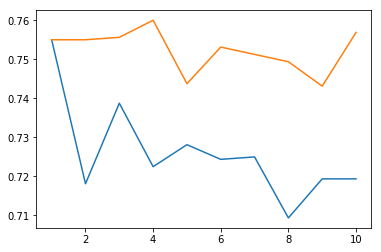

In [62]:
# Ваш код здесь
kneighbours = np.arange(1, 11)
weights_arr = ['uniform', 'distance']

acc_uniform = []
acc_distance = []
for j in weights_arr:
    for i in kneighbours:
        neigh = KNeighborsClassifier(n_neighbors=i, weights=j)
        neigh.fit(x_train, y_train)
        predictions = neigh.predict(x_test)
        if j == 'uniform':
            acc_uniform.append(metrics.accuracy_score(y_test, predictions))
        else:
            acc_distance.append(metrics.accuracy_score(y_test, predictions))

import matplotlib.pyplot as plt

plt.plot(kneighbours, acc_uniform)
plt.plot(kneighbours, acc_distance)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [64]:
# Ваш код здесь
# "Используя найденное оптимальное число соседей" - как это учесть??
neigh.predict_proba(x_test)[:, 1] #предсказание вероятностей классов

array([0.68122616, 0.        , 0.87496492, ..., 0.        , 1.        ,
       0.46480937])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [0]:
# Ваш код здесь